# Лабораторная работа 4

## Линейные модели, SVM и деревья решений.

### Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

Выберите набор данных (датасет) для решения задачи классификации или регрессии. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

### Обучите следующие модели:

- одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
- SVM;
- дерево решений.
  
Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
Постройте график, показывающий важность признаков в дереве решений.
Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

target_col='Country'

%matplotlib inline 
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('./Valo Lan Stats.csv')
data.head()

,Country,Player,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Japan,Ade,Crazy Raccoon,10,95,148,59,0.64,1.04,125.50,9.50,14.80,5.90
1,Japan,Fisker,Crazy Raccoon,10,122,164,39,0.74,0.98,176.50,12.20,16.40,3.90
2,South Korea,Bazzi,Crazy Raccoon,5,62,74,25,0.84,1.18,208.00,12.40,14.80,5.00
3,South Korea,Munchkin,Crazy Raccoon,14,272,229,69,1.19,1.49,193.75,19.43,16.36,4.93
4,Japan,Neth,Crazy Raccoon,14,183,212,73,0.86,1.21,177.50,13.07,15.14,5.21


In [ ]:
data.shape

(160, 13)

In [ ]:
data = data.dropna(axis=1, how='any')
data.head()

,Country,Player,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Japan,Ade,Crazy Raccoon,10,95,148,59,0.64,1.04,125.50,9.50,14.80,5.90
1,Japan,Fisker,Crazy Raccoon,10,122,164,39,0.74,0.98,176.50,12.20,16.40,3.90
2,South Korea,Bazzi,Crazy Raccoon,5,62,74,25,0.84,1.18,208.00,12.40,14.80,5.00
3,South Korea,Munchkin,Crazy Raccoon,14,272,229,69,1.19,1.49,193.75,19.43,16.36,4.93
4,Japan,Neth,Crazy Raccoon,14,183,212,73,0.86,1.21,177.50,13.07,15.14,5.21


In [ ]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Country - object - 0
Player - object - 0
Team - object - 0
Maps - int64 - 0
K - int64 - 0
D - int64 - 0
A - int64 - 0
KD - float64 - 0
KDA - float64 - 0
ACS/Map - float64 - 0
K/Map - float64 - 0
D/Map - float64 - 0
A/Map - float64 - 0


Категориальные признаки

In [ ]:
le = LabelEncoder()
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        data[col] = le.fit_transform(data[col]);
        print(col)

Country
Player
Team


# Разделение выборки на обучающую и тестовую

In [ ]:
X = data.drop(target_col, axis=1)
Y = data[target_col]

In [ ]:
X

,Player,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,0,3,10,95,148,59,0.64,1.04,125.50,9.50,14.80,5.90
1,40,3,10,122,164,39,0.74,0.98,176.50,12.20,16.40,3.90
2,8,3,5,62,74,25,0.84,1.18,208.00,12.40,14.80,5.00
3,89,3,14,272,229,69,1.19,1.49,193.75,19.43,16.36,4.93
4,95,3,14,183,212,73,0.86,1.21,177.50,13.07,15.14,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...
155,56,18,10,184,168,51,1.10,1.40,250.00,18.40,16.80,5.10
156,133,29,7,121,120,16,1.01,1.14,212.00,17.29,17.14,2.29
157,136,30,21,324,327,94,0.99,1.28,221.00,15.43,15.57,4.48
158,130,30,21,345,298,146,1.16,1.65,221.00,16.43,14.19,6.95


In [ ]:
Y

In [ ]:
pd.DataFrame(X, columns=X.columns).describe()

,Player,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,78.237500,14.356250,14.918750,220.737500,220.443750,80.793750,0.957250,1.303375,193.029687,14.242313,14.912687,5.113812
std,45.060056,8.899401,10.119395,164.120928,148.779088,65.216147,0.179884,0.216283,31.817407,2.724465,1.210045,1.534269
min,0.000000,0.000000,2.000000,13.000000,28.000000,4.000000,0.410000,0.750000,110.000000,6.000000,11.670000,1.750000
25%,39.750000,7.000000,6.750000,96.500000,103.000000,30.750000,0.837500,1.177500,172.875000,12.500000,14.060000,4.052500
50%,78.500000,14.000000,11.000000,161.000000,164.000000,58.000000,0.955000,1.315000,191.437500,14.100000,14.925000,5.140000
75%,117.000000,22.000000,24.000000,333.500000,346.750000,119.500000,1.090000,1.460000,212.000000,15.877500,15.510000,6.147500
max,155.000000,30.000000,39.000000,793.000000,612.000000,285.000000,1.340000,1.850000,263.500000,21.000000,18.250000,8.700000


### Разделим выборку на обучающую и тестовую:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(120, 12), (40, 12)
(120,), (40,)


# Обучение моделей
## Линейная модель

In [ ]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, Y_train)

SGDClassifier(max_iter=10000)

In [ ]:
f1_score(Y_test, SGD.predict(X_test), average='micro')
precision_score(Y_test, SGD.predict(X_test), average='micro')

0.275

## SVM

In [ ]:
SVC = SVC(kernel='rbf')
SVC.fit(X_train, Y_train)

SVC()

In [ ]:
f1_score(Y_test, SVC.predict(X_test), average='micro')
precision_score(Y_test, SVC.predict(X_test), average='micro')

0.325

## Дерево решений

In [ ]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
f1_score(Y_test, DT.predict(X_test), average='micro')
precision_score(Y_test, DT.predict(X_test), average='micro')

0.425

### Можно сделать вывод, что дерево решений дает лучший результат

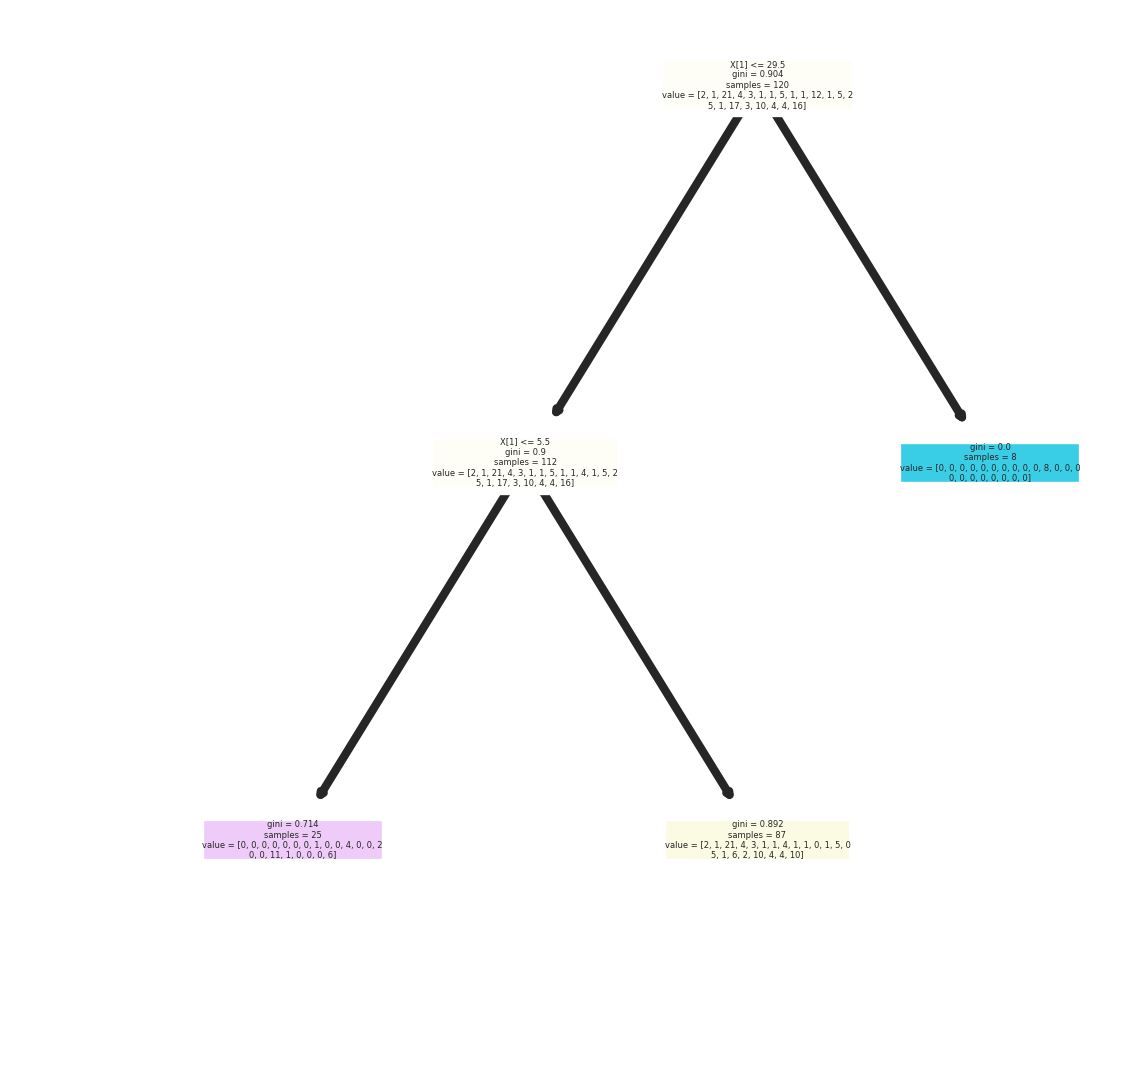

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (0.3,0.3), dpi=600)
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True);